import modules required to develop the model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


loading the dataset and displaying the top 5 rows to see the format of data

In [7]:
data = pd.read_csv("C:\\Users\\Deepu\\Documents\\DataScience\\Company Actions\\CompanyActionData.csv")
data.head()

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0


'Gender' is a text varibale which will not be valid for sklearn library. Since, it has only two possible values in this dataset, converting into numerical values without using any encoder

In [8]:
data.loc[data["Gender"] == "Female", "Gender"] = 1
data.loc[data["Gender"] == "Male", "Gender"] = 0

In [9]:
data.head()

,Age,Gender,TookAction
0,38,1,0
1,32,1,0
2,46,0,1
3,34,0,0
4,40,0,0


'Age', 'Gender' are the independent variables to predict the 'TookAction' which is the target variable

In [10]:
features = ["Age", "Gender"]
X = data[features]
X.head()

,Age,Gender
0,38,1
1,32,1
2,46,0
3,34,0
4,40,0


In [11]:
y = data.TookAction
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TookAction, dtype: int64

using the train_test_split method to split the data randomly into training and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

fitting the SVC model on the training dataset

In [13]:
predModel = SVC(kernel='linear')
predModel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Accuracy is calculated from the predictions made, and it is 96%

In [14]:
predictions = predModel.predict(X_test)
accuracy_score(y_test, predictions)

0.96

The graph is plotted for the age and the action taken, it is observed that, the people above the age of 40 are more likely to take any action in response to the emails sent. 

In [17]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        15\n           1       1.00      0.90      0.95        10\n\n   micro avg       0.96      0.96      0.96        25\n   macro avg       0.97      0.95      0.96        25\nweighted avg       0.96      0.96      0.96        25\n'

The below is the graph plotted for the test data variable 'Age' and predictions made

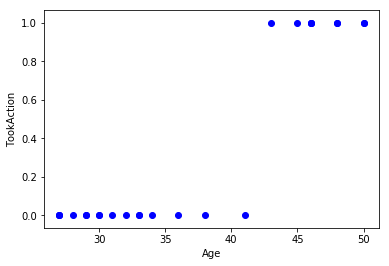

In [20]:
plt.xlabel("Age")
plt.ylabel("TookAction")
plt.scatter(X_test['Age'],predictions,color = "blue")
plt.show()

The below is the graph plotted for the test data variable 'Age' and y_test values

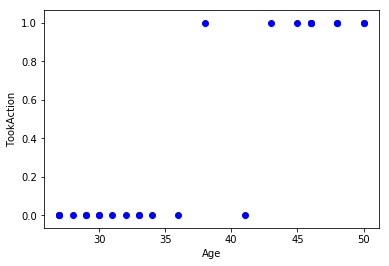

In [21]:
plt.xlabel("Age")
plt.ylabel("TookAction")
plt.scatter(X_test['Age'],y_test,color = "blue")
plt.show()